# Explore T3 Subject

Load and explore a T3 datafile.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os, pandas as pd, matplotlib.pyplot as plt, numpy as np, seaborn as sns, glob
from pynwb import NWBHDF5IO
import statsmodels.api as sm, statsmodels.formula.api as smf
from matplotlib.lines import Line2D

from pathlib import Path
from convnwb.io import load_nwbfile

from spiketools.plts.trials import plot_rasters
from spiketools.measures.spikes import compute_firing_rate
from spiketools.measures.trials import (compute_trial_frs, compute_pre_post_rates,
                                        compute_segment_frs, compute_pre_post_averages,
                                        compute_pre_post_diffs)

from spiketools.plts.trials import plot_rasters, plot_rate_by_time

### load data file

In [145]:
sess_file = sorted(glob.glob('../data/000623/sub-*/*.nwb'))[5]
nwbfile, io = load_nwbfile(os.path.basename(sess_file), os.path.dirname(sess_file), return_io=True)
nwbfile

,location,group,group_name,origchannel,pairwise_distances,origchannel_name,x,y,z
id,,,,,,,,,
0,Left ACC,Neuralynx-Atlas-microwire-1 pynwb.ecephys.ElectrodeGroup at 0x140459757947152\nFields:\n description: Behnke Fried/Micro Inner Wire Bundle (Behnke-Fried BF08R-SP05X-000 and WB09R-SP00X-0B6; Ad-Tech Medical)\n device: Neuralynx-Atlas pynwb.device.Device at 0x140459740260624\nFields:\n description: CS - Neuralynx-Atlas\n\n location: Left ACC\n,Neuralynx-Atlas-microwire-1,micro-1,NA,LACC1,-2.85,23.88,24.58
1,Left ACC,Neuralynx-Atlas-microwire-2 pynwb.ecephys.ElectrodeGroup at 0x140459757958160\nFields:\n description: Behnke Fried/Micro Inner Wire Bundle (Behnke-Fried BF08R-SP05X-000 and WB09R-SP00X-0B6; Ad-Tech Medical)\n device: Neuralynx-Atlas pynwb.device.Device at 0x140459740260624\nFields:\n description: CS - Neuralynx-Atlas\n\n location: Left ACC\n,Neuralynx-Atlas-microwire-2,micro-2,NA,LACC2,-2.85,23.88,24.58
2,Left ACC,Neuralynx-Atlas-microwire-3 pynwb.ecephys.ElectrodeGroup at 0x140459757959248\nFields:\n description: Behnke Fried/Micro Inner Wire Bundle (Behnke-Fried BF08R-SP05X-000 and WB09R-SP00X-0B6; Ad-Tech Medical)\n device: Neuralynx-Atlas pynwb.device.Device at 0x140459740260624\nFields:\n description: CS - Neuralynx-Atlas\n\n location: Left ACC\n,Neuralynx-Atlas-microwire-3,micro-3,NA,LACC3,-2.85,23.88,24.58
3,Left ACC,Neuralynx-Atlas-microwire-4 pynwb.ecephys.ElectrodeGroup at 0x140459757957456\nFields:\n description: Behnke Fried/Micro Inner Wire Bundle (Behnke-Fried BF08R-SP05X-000 and WB09R-SP00X-0B6; Ad-Tech Medical)\n device: Neuralynx-Atlas pynwb.device.Device at 0x140459740260624\nFields:\n description: CS - Neuralynx-Atlas\n\n location: Left ACC\n,Neuralynx-Atlas-microwire-4,micro-4,NA,LACC4,-2.85,23.88,24.58
,location,group,group_name,origchannel,pairwise_distances,origchannel_name,x,y,z
id,,,,,,,,,
0,Left ACC,Neuralynx-Atlas-microwire-1 pynwb.ecephys.ElectrodeGroup at 0x140459757947152\nFields:\n description: Behnke Fried/Micro Inner Wire Bundle (Behnke-Fried BF08R-SP05X-000 and WB09R-SP00X-0B6; Ad-Tech Medical)\n device: Neuralynx-Atlas pynwb.device.Device at 0x140459740260624\nFields:\n description: CS - Neuralynx-Atlas\n\n location: Left ACC\n,Neuralynx-Atlas-microwire-1,micro-1,NA,LACC1,-2.85,23.88,24.58
1,Left ACC,Neuralynx-Atlas-microwire-2 pynwb.ecephys.ElectrodeGroup at 0x140459757958160\nFields:\n description: Behnke Fried/Micro Inner Wire Bundle (Behnke-Fried BF08R-SP05X-000 and WB09R-SP00X-0B6; Ad-Tech Medical)\n device: Neuralynx-Atlas pynwb.device.Device at 0x140459740260624\nFields:\n description: CS - Neuralynx-Atlas\n\n location: Left ACC\n,Neuralynx-Atlas-microwire-2,micro-2,NA,LACC2,-2.85,23.88,24.58
2,Left ACC,Neuralynx-Atlas-microwire-3 pynwb.ecephys.ElectrodeGroup at 0x140459757959248\nFields:\n description: Behnke Fried/Micro Inner Wire Bundle (Behnke-Fried BF08R-SP05X-000 and WB09R-SP00X-0B6; Ad-Tech Medical)\n device: Neuralynx-Atlas pynwb.device.Device at 0x140459740260624\nFields:\n description: CS - Neuralynx-Atlas\n\n location: Left ACC\n,Neuralynx-Atlas-microwire-3,micro-3,NA,LACC3,-2.85,23.88,24.58


In [124]:
nwbfile.electrodes.to_dataframe()[-10:]

,location,group,group_name,origchannel,pairwise_distances,origchannel_name,x,y,z
id,,,,,,,,,
150,Right hippocampus,Neuralynx-Atlas-macros-87 pynwb.ecephys.Electr...,Neuralynx-Atlas-macros-87,macro-87,NA,RHIP7,61.94,-21.51,-7.89
151,Right hippocampus,Neuralynx-Atlas-macros-88 pynwb.ecephys.Electr...,Neuralynx-Atlas-macros-88,macro-88,NA,RHIP8,67.50,-21.51,-7.89
152,RSPE,Neuralynx-Atlas-macros-89 pynwb.ecephys.Electr...,Neuralynx-Atlas-macros-89,macro-89,NA,RSPE1,NaN,NaN,NaN
153,RSPE,Neuralynx-Atlas-macros-90 pynwb.ecephys.Electr...,Neuralynx-Atlas-macros-90,macro-90,NA,RSPE2,NaN,NaN,NaN
154,RSPE,Neuralynx-Atlas-macros-91 pynwb.ecephys.Electr...,Neuralynx-Atlas-macros-91,macro-91,NA,RSPE3,NaN,NaN,NaN
155,RSPE,Neuralynx-Atlas-macros-92 pynwb.ecephys.Electr...,Neuralynx-Atlas-macros-92,macro-92,NA,RSPE4,NaN,NaN,NaN
156,RSPE,Neuralynx-Atlas-macros-93 pynwb.ecephys.Electr...,Neuralynx-Atlas-macros-93,macro-93,NA,RSPE5,NaN,NaN,NaN
157,RSPE,Neuralynx-Atlas-macros-94 pynwb.ecephys.Electr...,Neuralynx-Atlas-macros-94,macro-94,NA,RSPE6,NaN,NaN,NaN
158,RSPE,Neuralynx-Atlas-macros-95 pynwb.ecephys.Electr...,Neuralynx-Atlas-macros-95,macro-95,NA,RSPE7,NaN,NaN,NaN


In [160]:
files = sorted(glob.glob('../data/000623/sub-*/*.nwb'))
locations = set()

for file in files:
    nwbfile, io = load_nwbfile(os.path.basename(sess_file), os.path.dirname(sess_file), return_io=True)
    
    unit_df = nwbfile.units.to_dataframe()
    electrode_df = nwbfile.electrodes.to_dataframe()

    for index, row in unit_df.iterrows():
        # Get the wire from electrodegroup_label
        wire = 'micro-' + row['electrodegroup_label'].split('-')[-1]

        # Create a condition to find matching indices in electrode_df
        # Assuming wire contains two parts, use them to match with origchannel
        matches = electrode_df[electrode_df['origchannel'].str.contains(wire)]

        locations.add(electrode_df['location'].iloc[matches.index[0]])

        # if not matches.empty:
        #     # If matches exist, just pick any (the first match in this case)
        #     print(electrode_df['location'].iloc[matches.index[0]])
        # else:
        #     print("No matching electrode found for wire:", wire)

    # break

print(locations)


{'Left amygdala', 'Left hippocampus', 'Right vmPFC', 'Right hippocampus'}


In [151]:
electrode_df

,location,group,group_name,origchannel,pairwise_distances,origchannel_name,x,y,z
id,,,,,,,,,
0,Left ACC,Neuralynx-Atlas-microwire-1 pynwb.ecephys.Elec...,Neuralynx-Atlas-microwire-1,micro-1,NA,LACC1,-2.85,23.88,24.58
1,Left ACC,Neuralynx-Atlas-microwire-2 pynwb.ecephys.Elec...,Neuralynx-Atlas-microwire-2,micro-2,NA,LACC2,-2.85,23.88,24.58
2,Left ACC,Neuralynx-Atlas-microwire-3 pynwb.ecephys.Elec...,Neuralynx-Atlas-microwire-3,micro-3,NA,LACC3,-2.85,23.88,24.58
3,Left ACC,Neuralynx-Atlas-microwire-4 pynwb.ecephys.Elec...,Neuralynx-Atlas-microwire-4,micro-4,NA,LACC4,-2.85,23.88,24.58
4,Left ACC,Neuralynx-Atlas-microwire-5 pynwb.ecephys.Elec...,Neuralynx-Atlas-microwire-5,micro-5,NA,LACC5,-2.85,23.88,24.58
...,...,...,...,...,...,...,...,...,...
171,RSPE,Neuralynx-Atlas-macros-92 pynwb.ecephys.Electr...,Neuralynx-Atlas-macros-92,macro-92,NA,RSPE4,NaN,NaN,NaN
172,RSPE,Neuralynx-Atlas-macros-93 pynwb.ecephys.Electr...,Neuralynx-Atlas-macros-93,macro-93,NA,RSPE5,NaN,NaN,NaN
173,RSPE,Neuralynx-Atlas-macros-94 pynwb.ecephys.Electr...,Neuralynx-Atlas-macros-94,macro-94,NA,RSPE6,NaN,NaN,NaN


In [140]:
# unique microwires in units subdirectory

sess_files = sorted(glob.glob('../data/000623/sub-*/*.nwb'))
unique_wires_by_subj = []

for file in sess_files:
    nwbfile, io = load_nwbfile(os.path.basename(sess_file), os.path.dirname(sess_file), return_io=True)
    df = nwbfile.units.to_dataframe()
    unique_wires_by_subj.extend(np.unique(df['electrodegroup_label'][:]))

unit_labs = np.unique(unique_wires_by_subj)
unit_labs = sorted([int(unit_lab.split('-')[-1]) for unit_lab in unit_labs])
print(unit_labs)
    

[1, 3, 4, 5, 7, 8, 9, 10, 11, 13, 14, 16, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 32, 34, 35, 36, 38, 39, 40, 42, 43, 44, 50, 52, 53, 55, 56, 57, 59, 60, 62, 63]


In [144]:
UNIQUE MICROWIRES IN ELECTRODES SUBDIRECTORY

sess_files = sorted(glob.glob('../data/000623/sub-*/*.nwb'))[2:]

for sess_file in sess_files:

    nwbfile, io = load_nwbfile(os.path.basename(sess_file), os.path.dirname(sess_file), return_io=True)
    
    wires.extend(nwbfile.electrodes.to_dataframe()['origchannel'])

unique_wires = sorted(np.unique(wires))
unique_wires = [unique_wire for unique_wire in unique_wires if 'micro' in unique_wire]
print(unique_wires)

['micro-1', 'micro-10', 'micro-11', 'micro-12', 'micro-13', 'micro-14', 'micro-15', 'micro-16', 'micro-17', 'micro-18', 'micro-19', 'micro-2', 'micro-20', 'micro-21', 'micro-22', 'micro-23', 'micro-24', 'micro-25', 'micro-26', 'micro-27', 'micro-28', 'micro-29', 'micro-3', 'micro-30', 'micro-31', 'micro-32', 'micro-33', 'micro-34', 'micro-35', 'micro-36', 'micro-37', 'micro-38', 'micro-39', 'micro-4', 'micro-40', 'micro-41', 'micro-42', 'micro-43', 'micro-44', 'micro-45', 'micro-46', 'micro-47', 'micro-48', 'micro-49', 'micro-5', 'micro-50', 'micro-51', 'micro-52', 'micro-53', 'micro-54', 'micro-55', 'micro-56', 'micro-57', 'micro-58', 'micro-59', 'micro-6', 'micro-60', 'micro-61', 'micro-62', 'micro-63', 'micro-64', 'micro-65', 'micro-66', 'micro-67', 'micro-68', 'micro-69', 'micro-7', 'micro-70', 'micro-71', 'micro-72', 'micro-73', 'micro-74', 'micro-75', 'micro-76', 'micro-77', 'micro-78', 'micro-79', 'micro-8', 'micro-80', 'micro-9']


In [89]:
    print(np.unique(tst2))
     

['micro-14' 'micro-18' 'micro-22' 'micro-25' 'micro-27' 'micro-28'
 'micro-29' 'micro-30' 'micro-31' 'micro-32' 'micro-5' 'micro-7']


In [161]:
def filter_spikes(spikes, start, stop):
    
    # grab spikes falling within trial times
    spikes = [spike for spike in spikes if start <= spike <= stop]
    # align to 0
    spikes_aligned = [spike - start for spike in spikes]
    # truncate all trials to 5s
    spikes_trunc = [spike for spike in spikes_aligned if spike < 5]
          
    print(spikes_trunc, end='\n')

    # smooth FRs
    window_size = 1
    step = .5

    # Create the time axis for the sliding window
    bins = np.arange(0, stop-start, step)

    # Create an array to hold the firing rate in each window
    FRs = np.zeros(len(bins))

    # Calculate firing rate for each window
    for i, t in enumerate(bins):
        window_start = t
        window_end = t + window_size
        spikes_in_window = [spike for spike in spikes if window_start <= spike <= window_stop]
        FRs[i] = np.sum(spikes_in_window) / window_size

    # plt.plot(bins, FRs)
    # plt.xlabel('bins')
    # plt.ylabel('FR')
    # plt.show()

    return spikes_trunc, FRs

def plt_rasters(c1_FR_by_trial):

    if np.mean(c1_FR_by_trial) > 0:
        plt.eventplot(c1_spikes_by_trial, linelengths=0.8, color='black')
        plt.ylabel('trial #')
        plt.xlabel('time (s)')
        plt.show()



In [47]:
sess_files = sorted(glob.glob('../data/000623/sub-*/*.nwb'))[2:]
c1_spikes_by_trial, c1_FR_by_trial, c1_smooth_spikes_by_trial = [], [], []
c2_spikes_by_trial, c2_FR_by_trial, c2_smooth_spikes_by_trial = [], [], []

for sess_file in sess_files:

    nwbfile, io = load_nwbfile(os.path.basename(sess_file), os.path.dirname(sess_file), return_io=True)
    subj = os.path.basename(sess_file)[:8]

    # convert trial structure to df and filter condition 1 vs 2 rows
    df_trials = nwbfile.trials[:]
    df_c1 = df_trials[df_trials['response_correct'] == 1.0][:]
    df_c2 = df_trials[df_trials['response_correct'] == 0.0]
    # print(df_c1.tail())

    # get start & stop times for each trial
    c1_starts, c1_stops = df_c1['start_time'].tolist(), df_c1['stop_time'].tolist()
    c2_starts, c2_stops = df_c2['start_time'].tolist(), df_c2['stop_time'].tolist()

    for neuron in range(len(nwbfile.units)):
        
        spikes = nwbfile.units.get_unit_spike_times(neuron)

        # condition 1
        
        for start, stop in zip(c1_starts, c1_stops):
            
            c1_spikes, c1_FR, c1_smooth_spikes = filter_spikes(spikes, start, stop)

            c1_spikes_by_trial.append(c1_spikes)
            c1_FR_by_trial.append(c1_FR)
            c1_smooth_spikes_by_trial.append(c1_smooth_spikes)

        # print(f'{subj}, neuron-{neuron}, FR:{np.mean(c1_FR_by_trial)}')
        # plt_rasters(c1_FR_by_trial)


        # condition 2
        
        for start, stop in zip(c2_starts, c2_stops):
            
            c2_spikes, c2_FR, c2_smooth_spikes = filter_spikes(spikes, start, stop)

            c2_spikes_by_trial.append(c2_spikes)
            c2_FR_by_trial.append(c2_FR)
            c2_smooth_spikes_by_trial.append(c2_smooth_spikes)

        # print(f'{subj}, neuron-{neuron}, FR:{np.mean(c2_FR_by_trial)}')
        # plt_rasters(c2_FR_by_trial)

        
        break
    break

print(len(c1_spikes_by_trial), len(c2_spikes_by_trial))
print(len(c1_spikes_by_trial) + len(c2_spikes_by_trial))
print(1459*40)


[0.0616099999999733, 0.18101624999997057, 0.20754750000003241, 0.9064214999999649, 1.8914214999999786, 2.561608999999976, 2.5872964999999795, 3.1088580000000547, 3.4518267500000093, 3.772670500000004, 3.7800767500000347, 3.8357955000000175, 3.8522329999999556]
[0.26514174999999796, 1.4851407500000278, 1.5297345000000178, 2.4892032500000596, 2.500953250000066, 2.5373594999999796, 2.655015750000075, 2.7243594999999914, 2.7331095000000687, 3.388202250000063, 3.5697022499999775, 3.5842647499999885, 3.6930772499999875, 4.83117100000004, 4.991233500000021]
[0.5548599999999624, 0.6229537499999651, 0.781735000000026, 0.9347974999999451, 0.9696412499999951, 1.217796499999963, 1.591984000000025, 2.1772339999999986, 2.9617964999999913, 2.9755777499999567, 2.983577749999995]
[0.10748424999997042, 0.13173425000002226, 0.6316405000000032, 1.2192655000000059, 1.411734249999995, 1.5210779999999886, 1.8154842499999404, 1.8219530000000077, 2.040202000000022, 2.1573270000000093]
[0.027048000000036154, 0.

In [35]:
print(1459*40-1450, 42266+13723)

56910 55989


In [141]:
spike_times = nwbfile.units.get_unit_spike_times(49)

recall_start = nwbfile.trials[:]['start_time'][1]
print(f'recall phase begins at {recall_start}')
encod_spike_times = spike_times[spike_times < recall_start]
recal_spike_times = spike_times[spike_times >= recall_start]

# plot_rasters(recal_spike_times, title='spikes during recall', show_axis=True)

recall phase begins at 576.639394


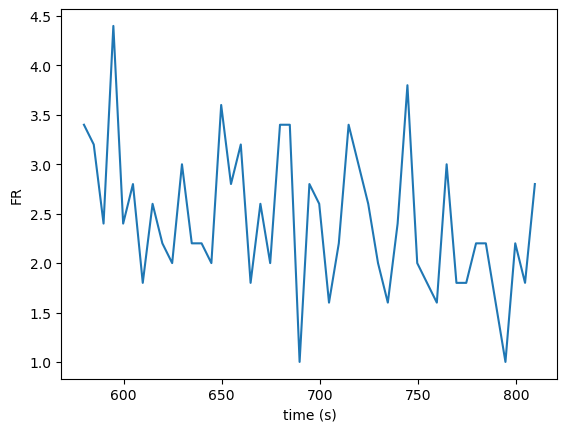

In [142]:
bin_len = 5
bin_edges = np.arange(recal_spike_times[0], recal_spike_times[-1], bin_len)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

spike_counts, _ = np.histogram(recal_spike_times, bins=bin_edges)

frs = spike_counts / bin_len
plt.plot(bin_centers, frs)
plt.xlabel('time (s)')
plt.ylabel('FR')
plt.show()

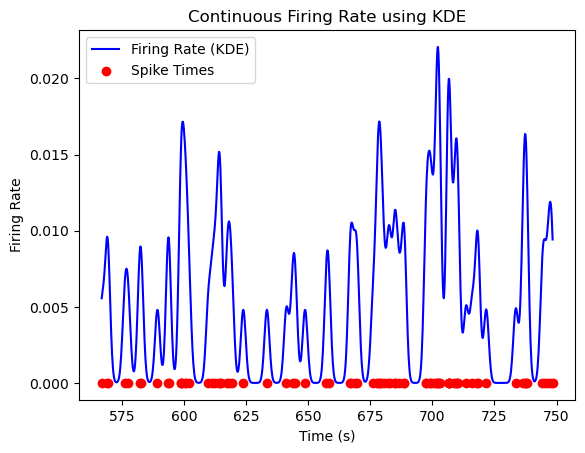

In [127]:
from scipy.stats import gaussian_kde

# Define time window for continuous firing rate estimation
time_range = np.linspace(recal_spike_times[0], recal_spike_times[-1], 1000)  # 1000 points over the spike time range

# Perform Kernel Density Estimation (KDE) using Gaussian kernel
bandwidth = 1.0  # You can adjust this for more or less smoothing
kde = gaussian_kde(recal_spike_times, bw_method=bandwidth / recal_spike_times.std(ddof=1))

# Evaluate KDE over the time range to get the firing rate estimate
firing_rate = kde(time_range)

# Plot the continuous firing rate
plt.plot(time_range, firing_rate, label="Firing Rate (KDE)", color="b")
plt.scatter(recal_spike_times, np.zeros_like(recal_spike_times), color="r", label="Spike Times")  # Indicate spike times
plt.xlabel('Time (s)')
plt.ylabel('Firing Rate')
plt.title('Continuous Firing Rate using KDE')
plt.legend()
plt.show()


(75,) (493, 75)
[[0.1 0.  0.  ... 0.  0.  0. ]
 [0.1 0.  0.  ... 0.  0.  0. ]
 [0.1 0.  0.  ... 0.  0.  0. ]
 ...
 [0.  0.  0.  ... 0.  0.  0.1]
 [0.  0.  0.  ... 0.  0.  0.1]
 [0.  0.  0.  ... 0.  0.  0.1]]


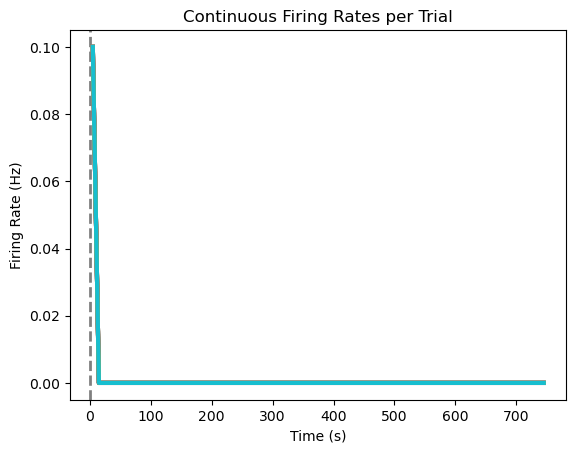

In [106]:
# Compute firing rates per trial
time_bin_length = 10.0
trial_times, trial_frs = compute_trial_frs(spike_times, time_bin_length,
                                           time_range=[0, spike_times[-1]])

print(trial_times.shape, trial_frs.shape)
print(trial_frs)

# Plot continuous firing rates across, separately for each trial
plot_rate_by_time(trial_times, trial_frs, vline=0,
                  title='Continuous Firing Rates per Trial')

### help functions

In [29]:
def get_sorted_units(pos,times,bins,starts,stops):

    units_sorted = {}
    
    for unit in range(60):

        spikes = nwbfile.units.get_unit_spike_times(unit)

        # 1. TRIAL LEVEL DATA FOR ANOVA
        
        tri_occ = compute_trial_occupancy(pos, times, bins, starts, stops, speed=speeds, min_speed=min_speed,
                                          area_range=[[-41, 55], [-170, -8]])
        tri_fr_map = compute_trial_place_bins(spikes, pos, times, bins, starts, stops, speed=speeds, min_speed=min_speed,
                                          trial_occupancy=tri_occ, area_range=[[-41, 55], [-170, -8]])
        
        # anova
        anov_df = create_dataframe_bins(np.reshape(tri_fr_map, (n_trials, 3, 10)))
        anov_results = fit_anova(anov_df, 'fr ~ C(xbin)*C(ybin)', return_type='results', anova_type=2)
        fval, pval = anov_results['F'][-2], anov_results['PR(>F)'][-2]
        
        # permutation testing
        # null_fvals = get_null_fvals(spikes)
        # pval, zscore = compute_surrogate_stats(fval, null_fvals)
        
        units_sorted[unit] = (fval, pval)

    # sort by ascending p val (descending place cellness)
    units_sorted = dict(sorted(units_sorted.items(), key=lambda item: item[1][1]))
    return units_sorted


def get_null_fvals(spikes):

    null_fvals = []
    
    for null_spikes in shuffle_spikes(spikes, 'circular', n_shuffles=1000):
        
        tri_occ = compute_trial_occupancy(pos, times, bins, starts, stops, speed=speeds, min_speed=min_speed,
                                          area_range=[[-41, 55], [-170, -8]])
        fr_map = compute_trial_place_bins(null_spikes, pos, times, bins, starts, stops, speed=speeds, min_speed=min_speed,
                                          trial_occupancy=tri_occ, area_range=[[-41, 55], [-170, -8]])
            
        # anova
        anova_df = create_dataframe_bins(np.reshape(fr_map, (n_trials, 3, 10)))
        fval = fit_anova(anova_df, 'fr ~ C(xbin)*C(ybin)', return_type='results', anova_type=2)['F'][-2]
        null_fvals.append(fval)

    return null_fvals


def get_fr_map(unit):

    spikes = nwbfile.units.get_unit_spike_times(unit)
    occ = compute_occupancy(pos, times, bins, speed=speeds, min_speed=min_speed,
                            area_range=[[-41, 55], [-170, -8]])
    fr_map = compute_place_bins(spikes, pos, times, bins, speed=speeds, min_speed=min_speed,
                                occupancy=occ, area_range=[[-41, 55], [-170, -8]])

    return fr_map


def rsa(units_3d_sorted, unit, n_tri_pairs):

    fr_map_3d = units_3d_sorted[unit]
    corr_mtx = np.zeros((n_tri_pairs, n_tri_pairs))
    model = np.zeros((n_tri_pairs, n_tri_pairs))
    
    for i in range(n_tri_pairs):
        for j in range(i+1, n_tri_pairs):  
            
            model[i,j] = model[j,i] = np.mean([i,j])
            corr_mtx[i,j] = corr_mtx[j,i] = np.corrcoef(fr_map_3d[i].flatten(),\
                                                        fr_map_3d[j].flatten())[0,1]


    # model fitting
    model = rankdata(model).reshape(model.shape)
    model = model / np.max(model)
    r_permute, p_permute = spearmanr(model[np.tril_indices(16, k=-1)], corr_mtx[np.tril_indices(16, k=-1)])

    # if not p_permute<.05:
    #     return
    
    # want to find in the auto_corr mtx the retrieval trials with highest corr
    # so we find the index of the trials a & b (row & col) with highest corr from the bottom right square of the mtx
    submtx = corr_mtx[n_tri_pairs//2:, n_tri_pairs//2:]
    lower_inds = np.tril_indices_from(submtx, k=-1)
    lower_vals = submtx[lower_inds]
    sorted_inds = np.argsort(lower_vals)[::-1]
    top_row_inds = lower_inds[0][sorted_inds] + n_tri_pairs//2
    top_col_inds = lower_inds[1][sorted_inds] + n_tri_pairs//2
    
    fig, ax = plt.subplots(1, 5, figsize=(15, 3))
    fval, pval = units_sorted[unit]
    fig.suptitle(f'unit {unit}, place cell (fval: {fval:.3f}, pval: {pval:.3f})')

    # 1. plot mtx
    ax[0].set_title(f'tri-tri fr map corr mtx\nr: {r_permute:.3f}, p: {p_permute:.3f}')
    rng = np.max([np.abs(np.max(corr_mtx)), np.abs(np.min(corr_mtx))])
    heatmap = sns.heatmap(corr_mtx, ax=ax[0], square=True, cmap='coolwarm', vmin=np.min(corr_mtx), vmax=np.max(corr_mtx))
    heatmap.set_xticks([])
    heatmap.set_yticks([])
    heatmap.set_xlabel('trial-pairs')
    heatmap.set_ylabel('trial-pairs')

    
    # 2. plot overall PF
    ax[1].set_title(f'overall PF map')
    plot_heatmap(get_fr_map(unit), invert='y', ax=ax[1], cbar=True)
    
    
    # 3. plot correlations between particularly similar trial pairs
    for i in range(3):
        diff = np.abs(fr_map_3d[top_col_inds[i]] - fr_map_3d[top_row_inds[i]])
        diff[diff == 0] = np.finfo(float).eps
        fr_map_corr = 1.0 / diff
        plot_heatmap(fr_map_corr, invert='y', ax=ax[i+2], cbar=True)
        ax[i+2].set_title('single tri-tri corr map')
    
    plt.tight_layout()
    plt.show()


### get data

In [25]:
# get trial data
all_tris = nwbfile.trials[:]
drop_inds = [0, 1, 24, 25] # drop screening trials
all_tris.drop(drop_inds, inplace=True)
all_tris.reset_index(drop=True, inplace=True)
n_trials = len(all_tris)  

# get trial starts, stops
starts, stops = all_tris['start_time'].tolist(), all_tris['stop_time'].tolist()
# starts, stops = starts[1::2], stops[1::2]

# get time & place data
data = nwbfile.acquisition['position']['player_position']
pos, times = data.data[:], data.timestamps[:]
speeds = compute_speed(pos, times)
min_speed = .5e-3

# filter by expt start & stop
inds = np.where((starts[0] <= times) & (times <= stops[-1]))
pos, times, speeds = pos[inds], times[inds], speeds[inds]
n_data_inds = len(times)
print(f'n_time_points: {n_data_inds}')

# misc
bins = [3,10]

# unit data: sorted from place to non-place cells
units_sorted = get_sorted_units(pos,times,bins,starts,stops)

all_tris.tail()


n_time_points: 35214


,start_time,stop_time,button_press_time,chest_encoding_time,choice_point_start_time,choice_point_stop_time,chosen_direction,correct_direction,error,trial_type,turn_correctness,turn_response_time
27,2243.298131,2293.469798,2273.929928,NaN,2257.864034,2260.327018,right,right,17.117974,retrieval,True,2259.314025
28,2293.608798,2345.564453,2329.277561,NaN,2308.033702,2311.391680,left,left,5.751216,retrieval,True,2310.390686
29,2345.703452,2399.491096,2377.486242,NaN,2360.163356,2363.592334,right,right,17.189090,retrieval,True,2362.549340
30,2399.635095,2452.181746,2437.201846,NaN,2414.030999,2416.372984,left,left,36.419213,retrieval,True,2415.344991
31,2452.328746,2507.939377,2483.264540,NaN,2467.009648,2469.626631,right,right,16.884231,retrieval,True,2468.595638


## store, per unit, n_trial * n_xbins * n_ybins fr map, and tag noisy units

In [27]:
units_3d_sorted = {} # stores trial fr map per unit
units_dropped = []

for unit in units_sorted:
    
    spikes = nwbfile.units.get_unit_spike_times(unit)

    tri1_occ = compute_trial_occupancy(pos, times, bins, starts[::2], stops[::2], speed=speeds, min_speed=min_speed,
                                       area_range=[[-41, 55], [-170, -8]])
    tri2_occ = compute_trial_occupancy(pos, times, bins, starts[1::2], stops[1::2], speed=speeds, min_speed=min_speed,
                                       area_range=[[-41, 55], [-170, -8]])
    tri_pair_occ = (tri1_occ + tri2_occ) / 2
    # tri_pair_occ = compute_trial_occupancy(pos, times, bins, starts[::2], stops[1::2], speed=speeds, min_speed=min_speed, area_range=[[-41, 55], [-170, -8]])
    
    tri1_fr_map = compute_trial_place_bins(spikes, pos, times, bins, starts[::2], stops[::2], speed=speeds, min_speed=min_speed,
                                           trial_occupancy = tri_pair_occ, area_range=[[-41, 55], [-170, -8]])
    tri2_fr_map = compute_trial_place_bins(spikes, pos, times, bins, starts[1::2], stops[1::2], speed=speeds, min_speed=min_speed, 
                                           trial_occupancy = tri_pair_occ, area_range=[[-41, 55], [-170, -8]])
    tri_pair_fr_map = (tri1_fr_map + tri2_fr_map) / 2
    # tri_pair_fr_map = compute_trial_place_bins(spikes, pos, times, bins, starts[::2], stops[1::2],\
    #                                            trial_occupancy=tri_pair_occ, area_range=[[-41, 55], [-170, -8]])

    # drop super noisy neurons
    for i in range(n_trials//2):
        if np.all(tri_pair_fr_map[i] == 0):
            units_dropped.append(unit)
            break

    # store by-trial fr map per unit
    units_3d_sorted[unit] = tri_pair_fr_map

print(f'units to be dropped: {units_dropped}')


units to be dropped: [34, 31, 12, 37, 10, 28]


## plot a) place field map and b) trial-by-trial corr of PF map

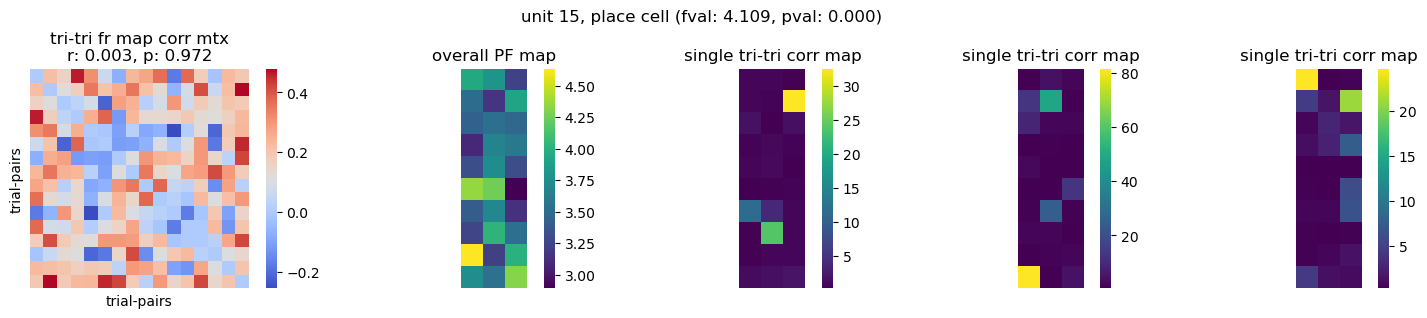

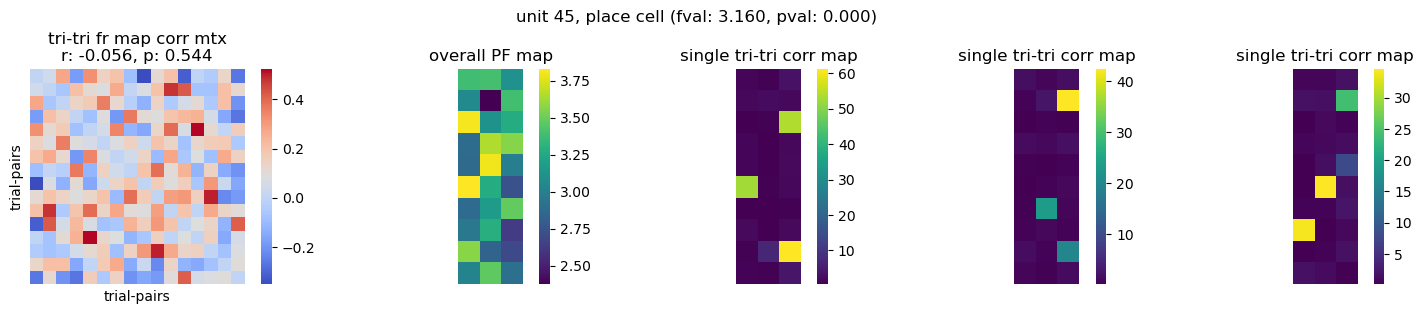

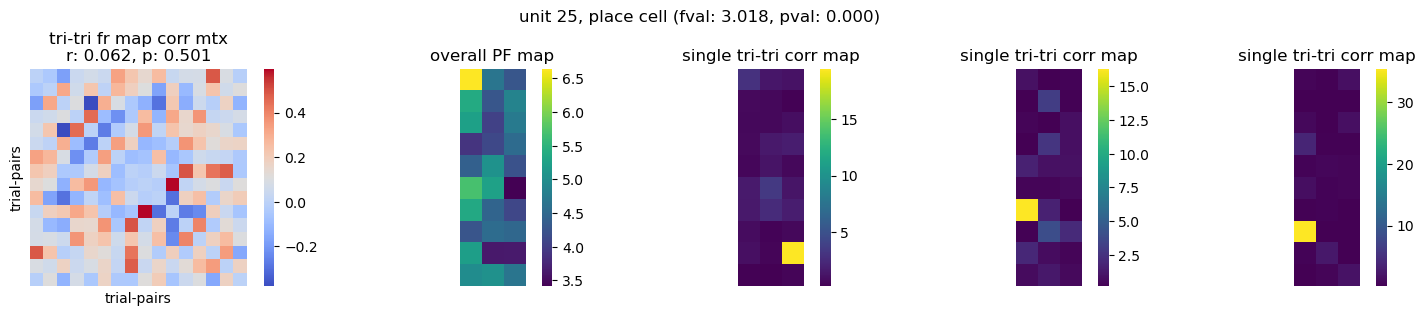

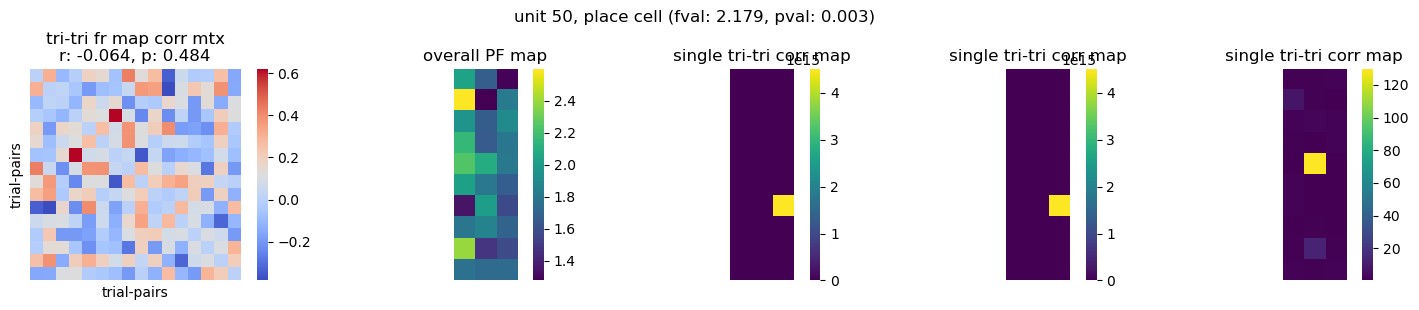

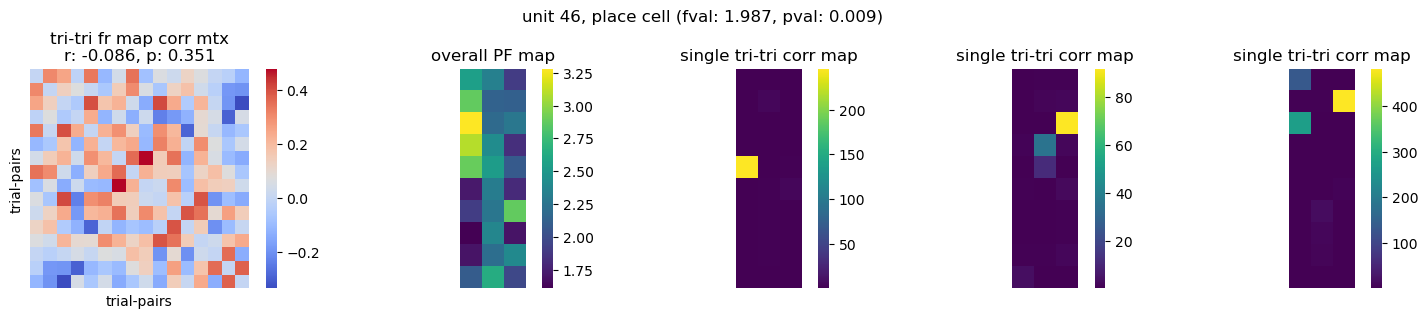

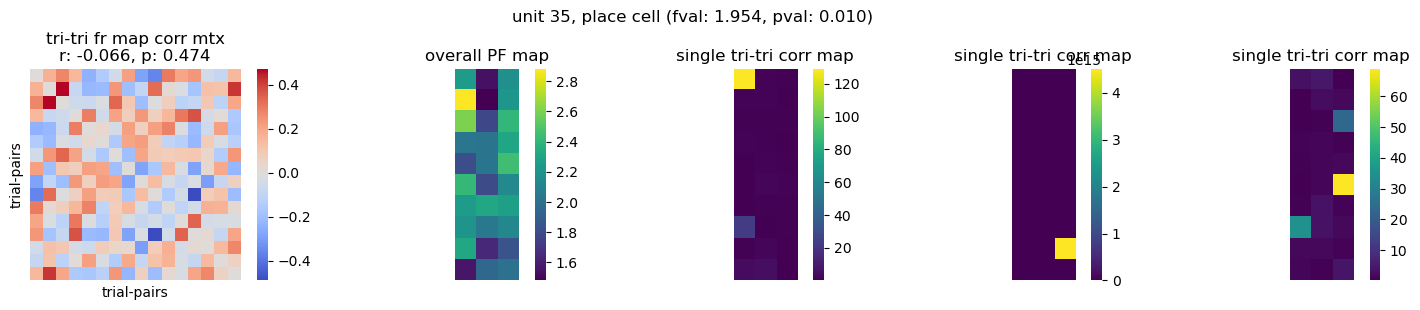

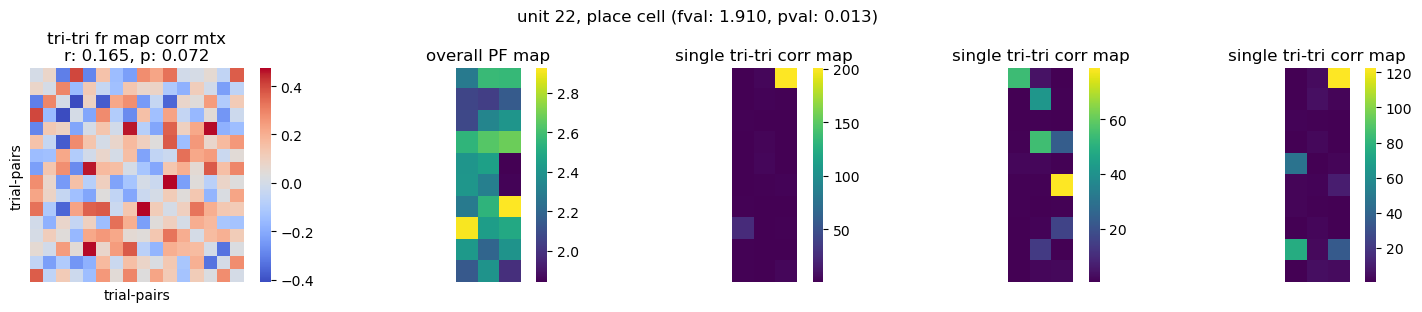

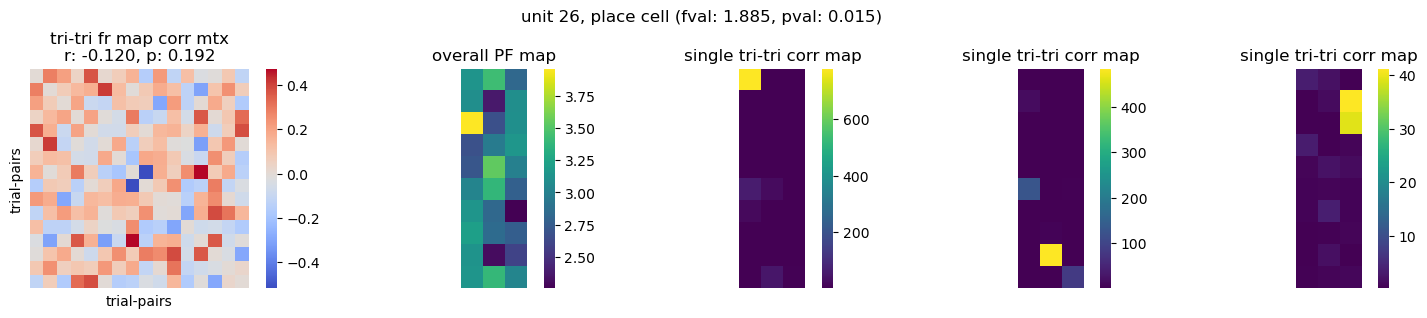

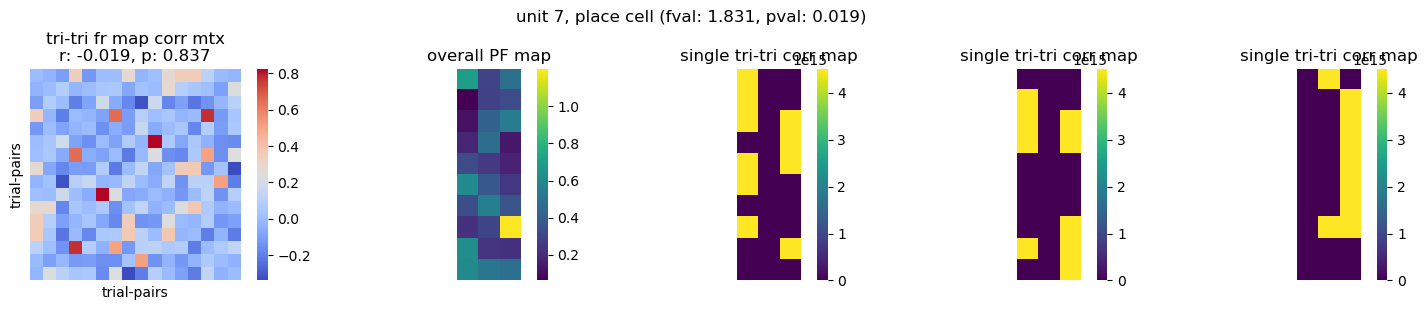

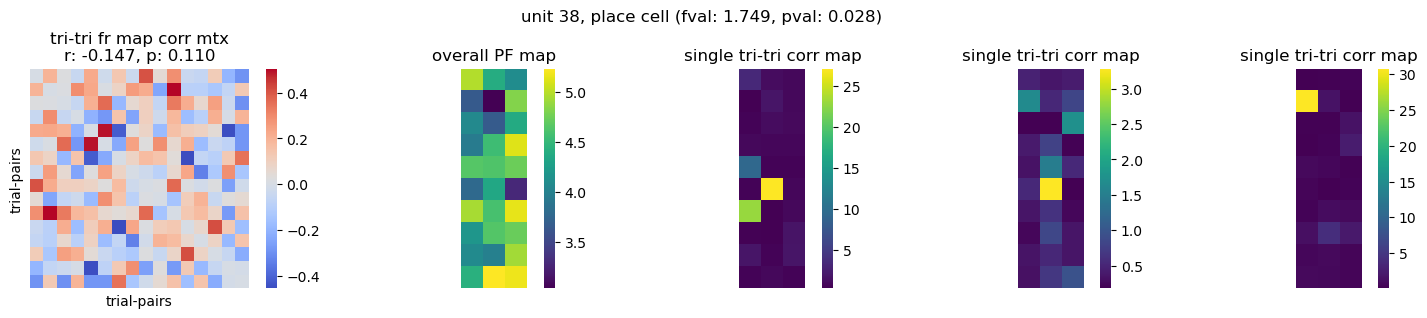

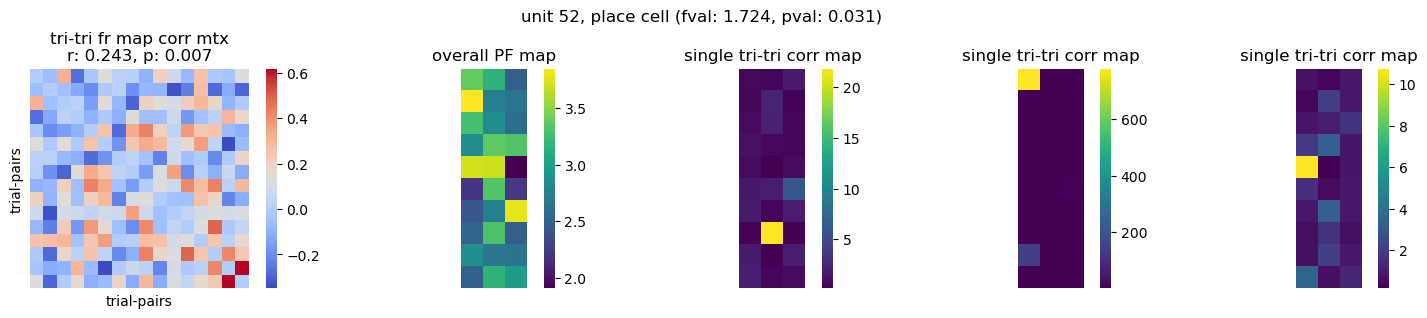

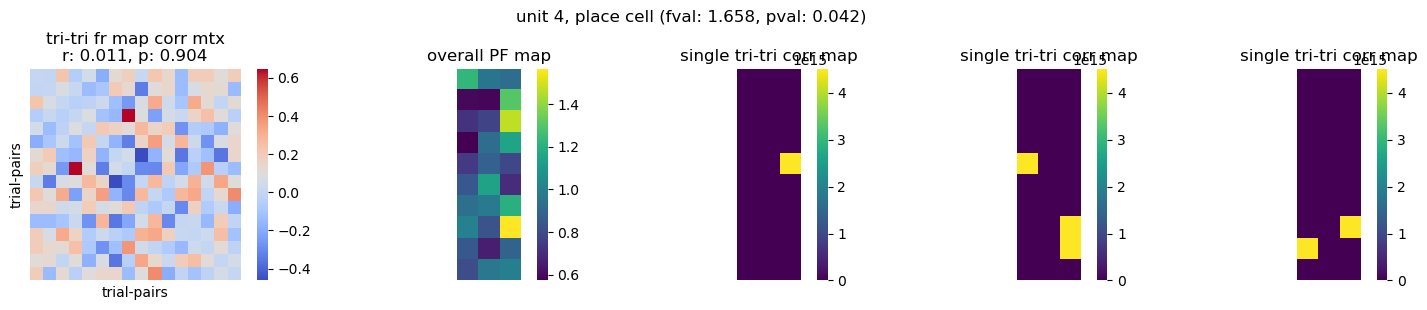

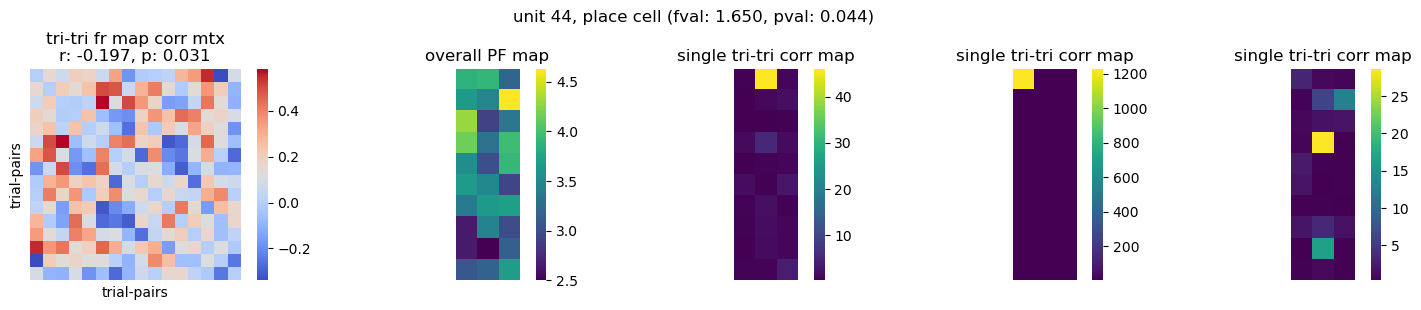

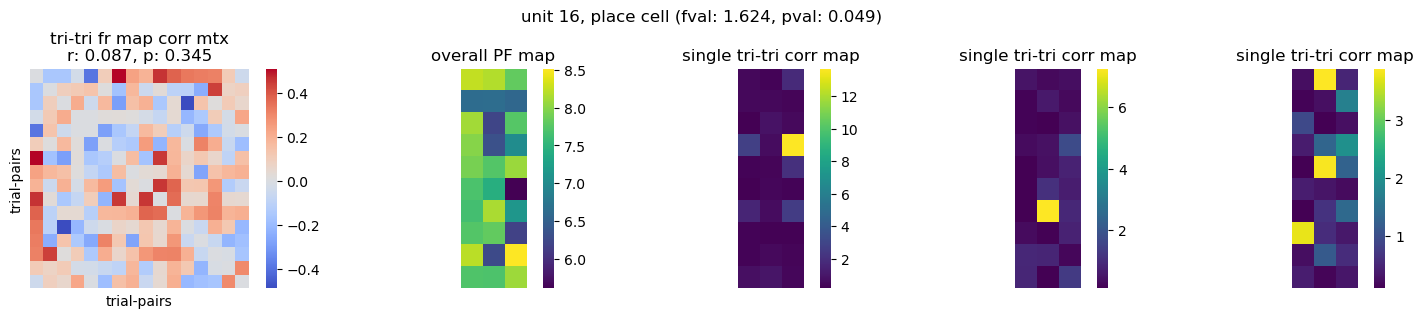

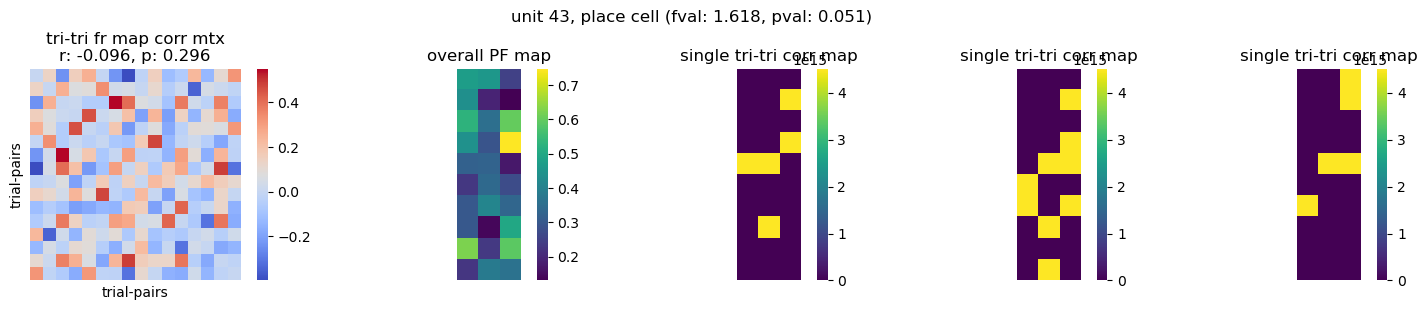

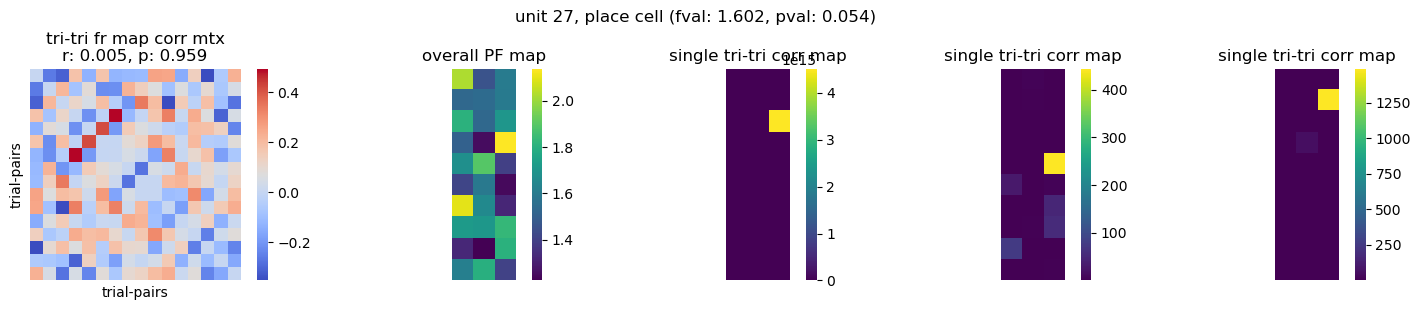

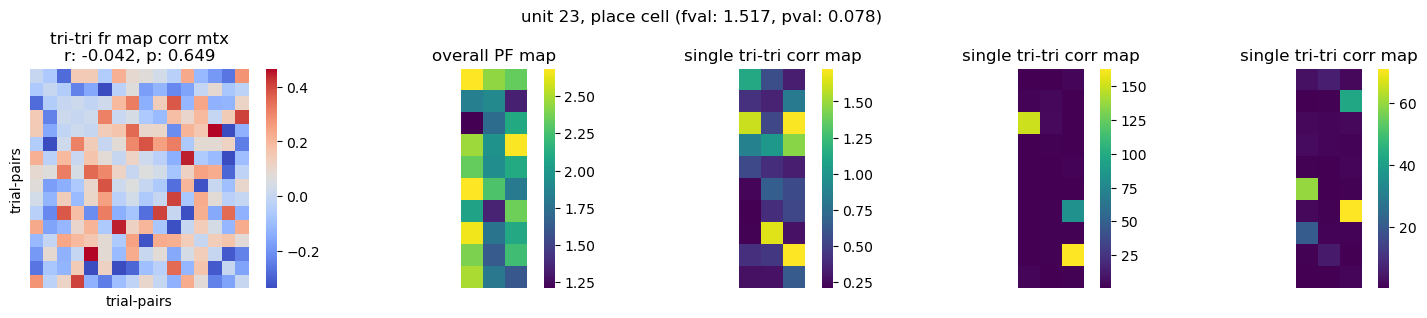

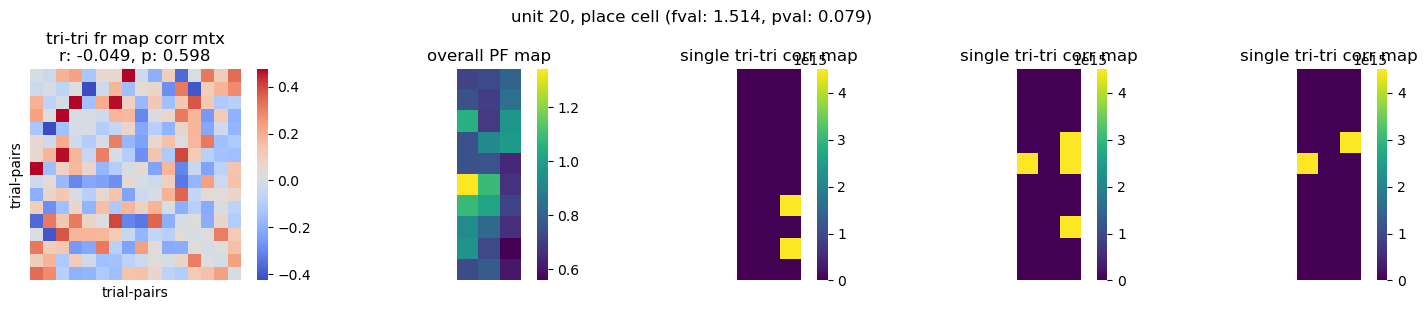

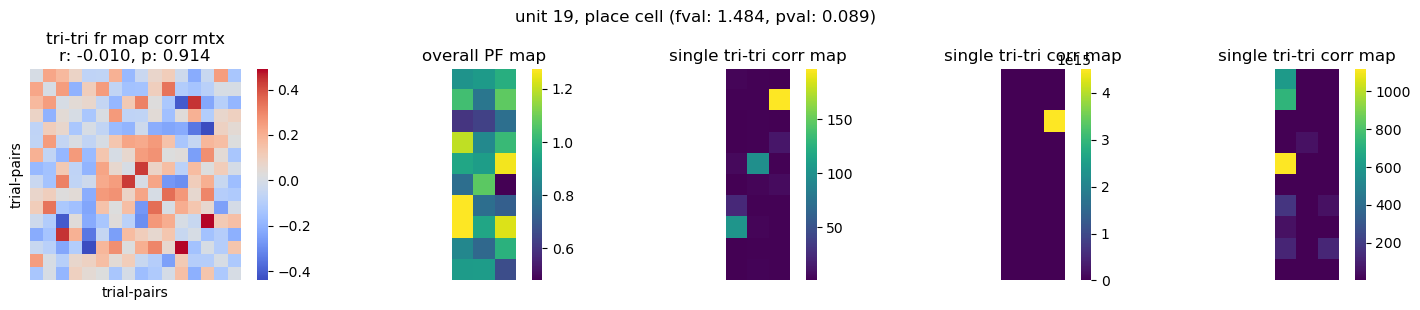

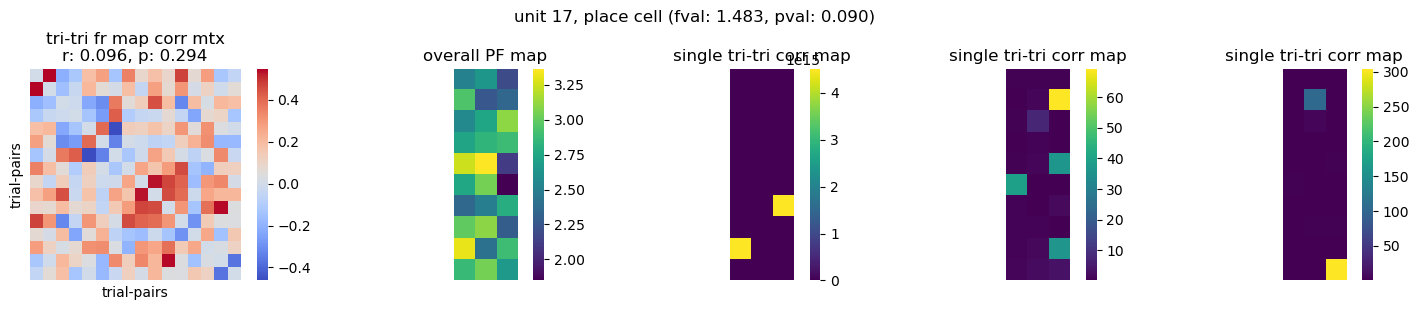

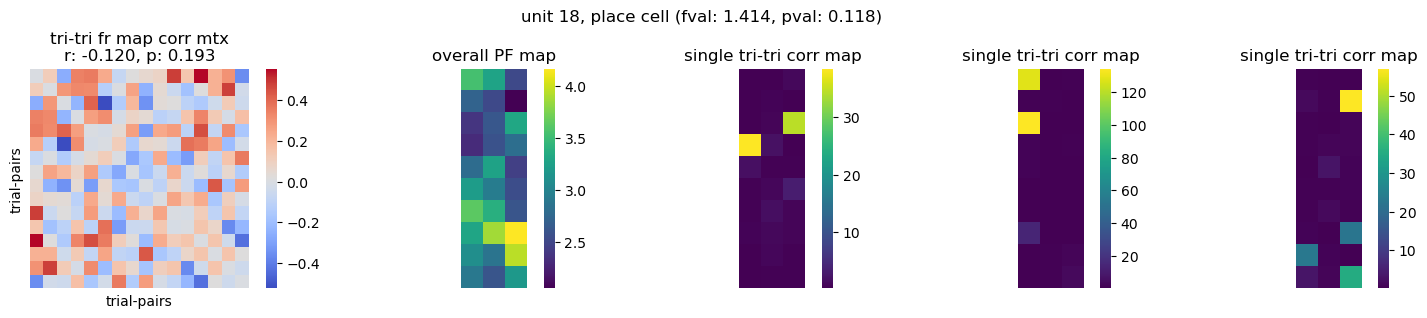

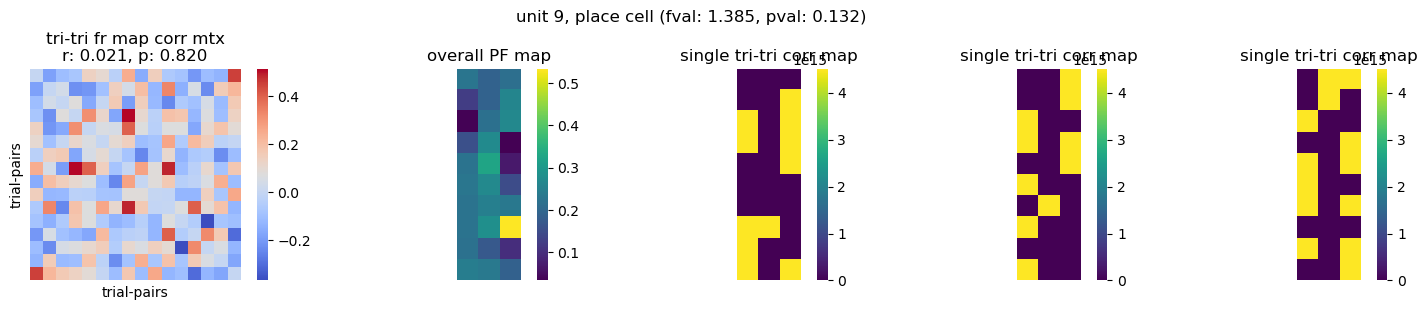

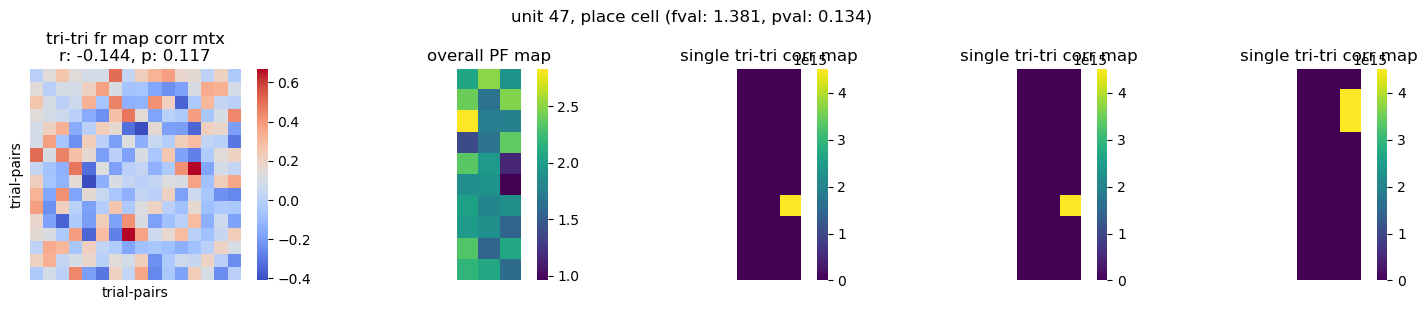

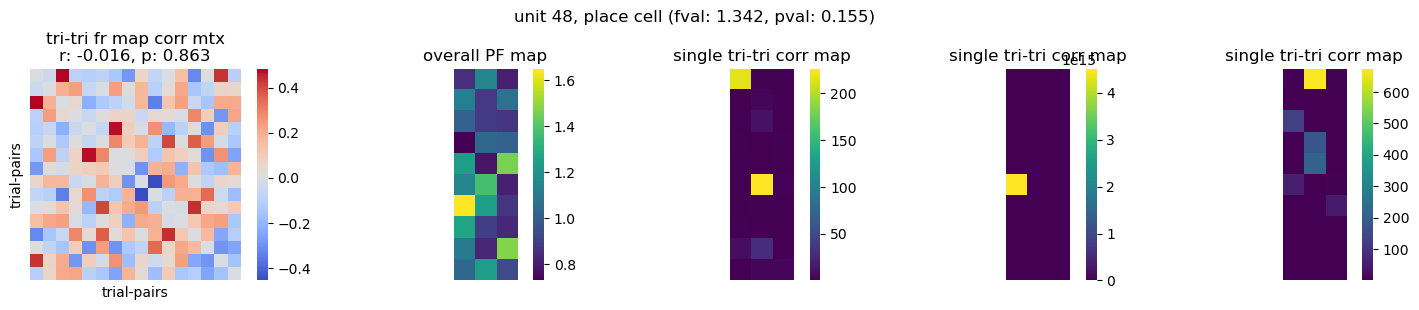

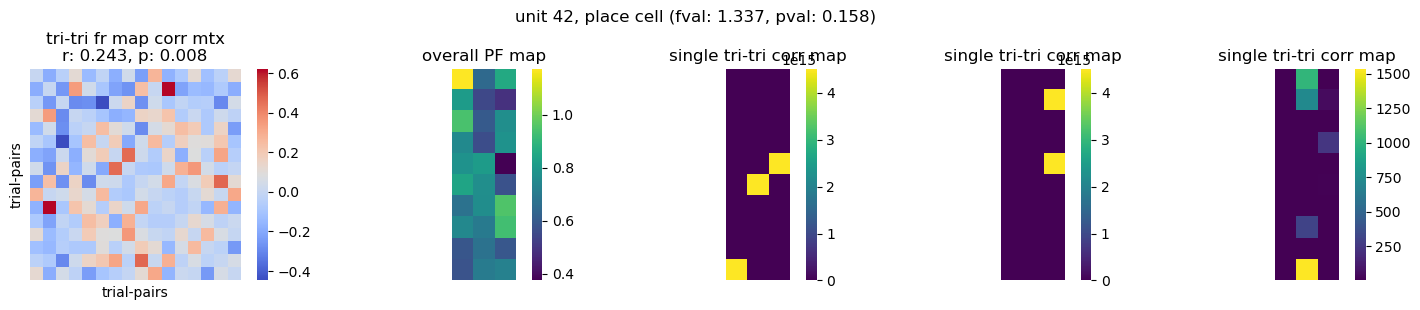

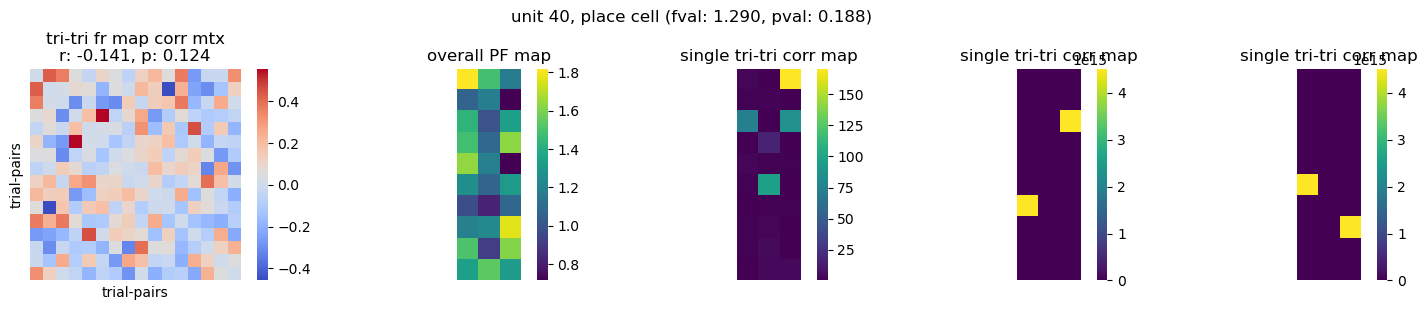

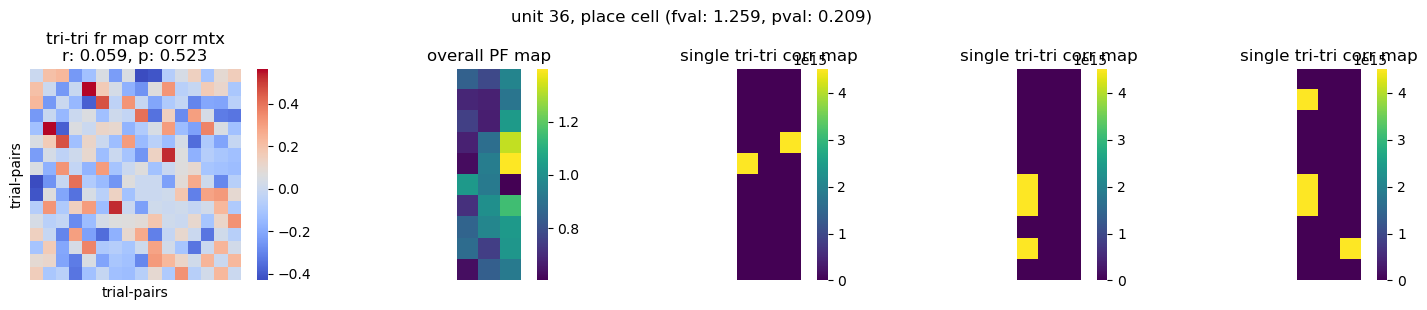

In [30]:
for unit in list(units_sorted.keys())[:30]:
    
    if not unit in units_dropped:        
        rsa(units_3d_sorted, unit, n_trials//2)
    